<a href="https://colab.research.google.com/github/Fernsrea/flow_matching/blob/main/Masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torchvision import datasets, transforms

# Parameters
mask_size = 8  # Size of the square mask
image_size = 28

# Create a deterministic center square mask
def create_center_mask():
    mask = torch.ones((image_size, image_size), dtype=torch.float32)
    start = (image_size - mask_size) // 2
    end = start + mask_size
    mask[start:end, start:end] = 0.0
    return mask

# Load MNIST
transform = transforms.ToTensor()
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Apply mask to an image
mask = create_center_mask()
sample_image, _ = mnist[0]
masked_image = sample_image.squeeze() * mask

# masked_image now contains the image with a fixed square mask


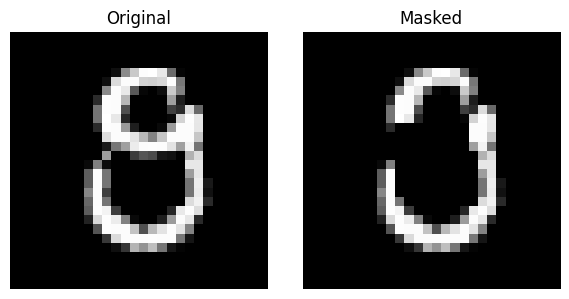

In [6]:
import matplotlib.pyplot as plt

# Sample image and mask application
sample_image, _ = mnist[80]
original = sample_image.squeeze()
masked = original * mask

# Plotting
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Masked")
plt.imshow(masked, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


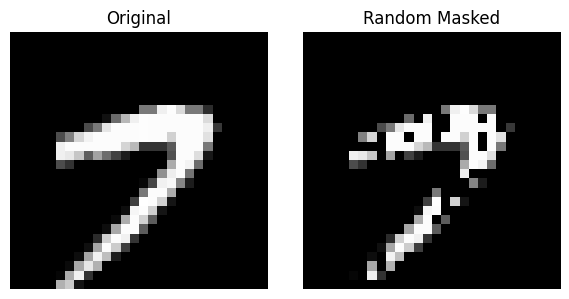

In [3]:
import torch
import random
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Parameters
mask_ratio = 0.3  # 30% of the pixels will be masked
image_size = 28

# Function to create a random mask
def create_random_mask(image_shape, mask_ratio):
    mask = torch.ones(image_shape, dtype=torch.float32)
    num_pixels = image_shape[0] * image_shape[1]
    num_mask = int(mask_ratio * num_pixels)

    indices = random.sample(range(num_pixels), num_mask)
    flat_mask = mask.view(-1)
    flat_mask[indices] = 0.0
    return flat_mask.view(image_shape)

# Load MNIST
transform = transforms.ToTensor()
mnist = datasets.MNIST(root='./data/image_generation/', train=True, download=True, transform=transform)

# Apply random mask to a sample image
sample_image, _ = mnist[91]
original = sample_image.squeeze()
mask = create_random_mask(original.shape, mask_ratio)
masked = original * mask

# Visualize
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Random Masked")
plt.imshow(masked, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

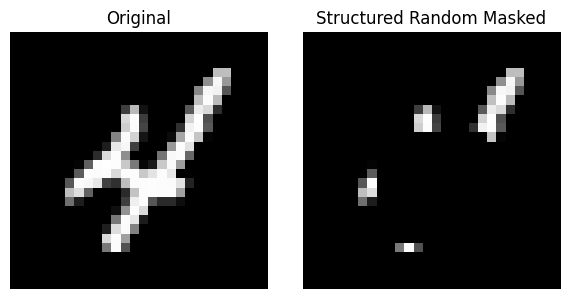

In [8]:
import torch
import random
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Parameters
mask_size = 12  # square mask size
image_size = 28

# Function to create a structured random square mask
def create_structured_random_mask(image_shape, mask_size):
    mask = torch.ones(image_shape, dtype=torch.float32)
    max_x = image_shape[0] - mask_size
    max_y = image_shape[1] - mask_size
    top_x = random.randint(0, max_x)
    top_y = random.randint(0, max_y)
    mask[top_x:top_x + mask_size, top_y:top_y + mask_size] = 0.0
    return mask

# Load MNIST
transform = transforms.ToTensor()
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Apply structured random mask to a sample image
sample_image, _ = mnist[9]
original = sample_image.squeeze()
mask = create_structured_random_mask(original.shape, mask_size)
masked = original * mask

# Visualize
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Structured Random Masked")
plt.imshow(masked, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [1]:
import torch
import random
import os
from torchvision import datasets, transforms
from torchvision.utils import save_image
from tqdm import tqdm

# Parameters
mask_size = 14
output_dir = './data/image_generation/'
os.makedirs(output_dir, exist_ok=True)

# Function to create structured random square mask
def create_structured_random_mask(image_shape, mask_size):
    mask = torch.ones(image_shape, dtype=torch.float32)
    max_x = image_shape[0] - mask_size
    max_y = image_shape[1] - mask_size
    top_x = random.randint(0, max_x)
    top_y = random.randint(0, max_y)
    mask[top_x:top_x + mask_size, top_y:top_y + mask_size] = 0.0
    return mask

# Load MNIST dataset
transform = transforms.ToTensor()
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Apply mask and save each image
for idx, (image, _) in tqdm(enumerate(mnist), total=len(mnist)):
    image = image.squeeze()  # shape: [28, 28]
    mask = create_structured_random_mask(image.shape, mask_size)
    masked_image = image * mask
    save_path = os.path.join(output_dir, f"masked_{idx:05d}.png")
    save_image(masked_image, save_path)


100%|██████████| 9.91M/9.91M [00:00<00:00, 41.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.18MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.9MB/s]
100%|██████████| 60000/60000 [00:36<00:00, 1623.54it/s]
